# Preprocessing and Adaboost Classification using TF-IDF Vectorization and using Derived Attributes 

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [2]:
mails = pd.read_csv('spamfinal.csv', encoding = 'latin-1')
mails.head()

,Unnamed: 0,Category,Message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell
0,0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1
1,1,ham,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1
3,3,ham,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1


In [3]:
mails.rename(columns = {'Category': 'labels', 'Message': 'message'}, inplace = True)
mails.head()

,Unnamed: 0,labels,message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell
0,0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1
1,1,ham,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1
3,3,ham,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1


In [4]:
mails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [5]:
mails['label'] = mails['labels'].map({'ham': 0, 'spam': 1})
mails.head()

,Unnamed: 0,labels,message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell,label
0,0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1,0
1,1,ham,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1,0
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1,1
3,3,ham,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1,0
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1,0


In [6]:
mails.drop(['labels'], axis = 1, inplace = True)
mails.head()

,Unnamed: 0,message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell,label
0,0,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1,0
1,1,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1,0
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1,1
3,3,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1,0
4,4,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1,0


In [7]:

totalMails = 4825 + 747
trainIndex, testIndex = list(), list()
for i in range(mails.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [8]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,Unnamed: 0,message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell,label
0,0,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1,0
1,1,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1,0
2,3,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1,0
3,4,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1,0
4,5,FreeMsg Hey there darling it's been 3 week's n...,0,0,0,6,0,148,0,0,2,32,5,1


In [9]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,Unnamed: 0,message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell,label
0,2,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1,1
1,8,WINNER!! As a valued network customer you have...,0,0,0,2,0,158,2,1,3,26,5,1
2,19,England v Macedonia - dont miss the goals/team...,0,4,0,4,0,156,2,0,0,24,5,1
3,20,Is that seriously how you spell his name?,0,0,0,0,0,41,0,0,0,8,1,0
4,23,Aft i finish my lunch then i go str down lor. ...,0,0,0,5,0,88,1,0,0,20,1,0


In [10]:
trainData['label'].value_counts()

0    3618
1     554
Name: label, dtype: int64

In [11]:
testData['label'].value_counts()

0    1207
1     193
Name: label, dtype: int64

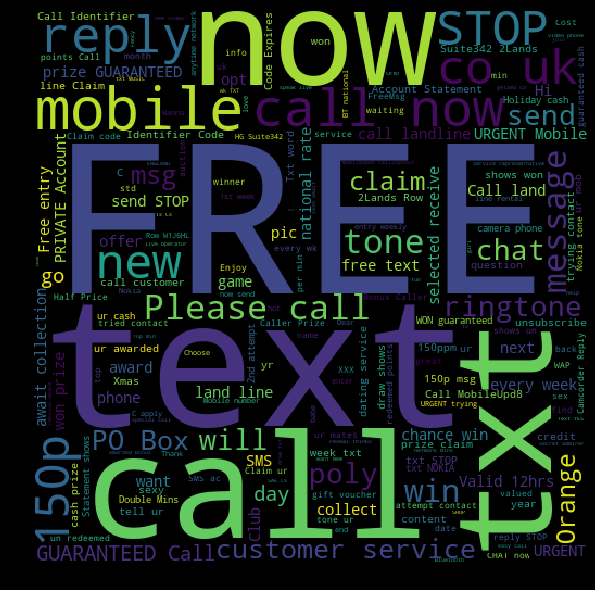

In [12]:
spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.savefig('Madhurima_CloudSpam.png', dpi=800)
plt.show()

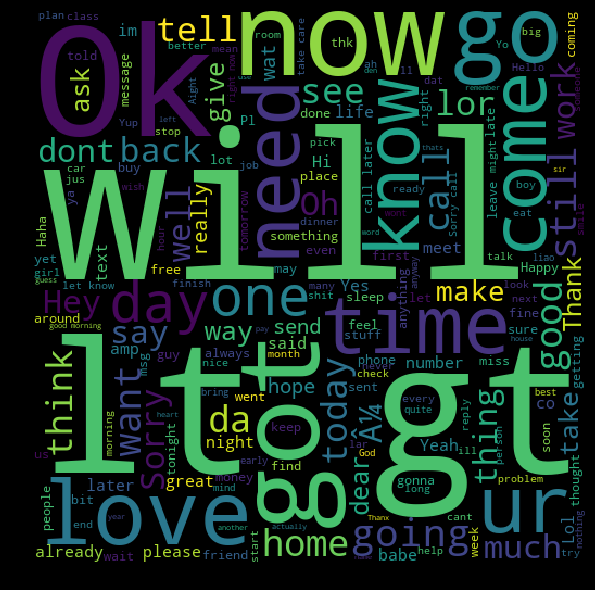

In [13]:
ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.savefig('Madhurima_CloudHam.png', dpi=800)
plt.show()

In [14]:
trainData.head()

,Unnamed: 0,message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell,label
0,0,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1,0
1,1,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1,0
2,3,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1,0
3,4,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1,0
4,5,FreeMsg Hey there darling it's been 3 week's n...,0,0,0,6,0,148,0,0,2,32,5,1


In [15]:
trainData['label'].value_counts()

0    3618
1     554
Name: label, dtype: int64

In [16]:
testData.head()

,Unnamed: 0,message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell,label
0,2,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1,1
1,8,WINNER!! As a valued network customer you have...,0,0,0,2,0,158,2,1,3,26,5,1
2,19,England v Macedonia - dont miss the goals/team...,0,4,0,4,0,156,2,0,0,24,5,1
3,20,Is that seriously how you spell his name?,0,0,0,0,0,41,0,0,0,8,1,0
4,23,Aft i finish my lunch then i go str down lor. ...,0,0,0,5,0,88,1,0,0,20,1,0


In [17]:
testData['label'].value_counts()

0    1207
1     193
Name: label, dtype: int64

In [18]:

def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [19]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [20]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [21]:
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.9183673469387755
Recall:  0.6994818652849741
F-score:  0.7941176470588236
Accuracy:  0.95


In [22]:
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.9133858267716536
Recall:  0.6010362694300518
F-score:  0.7250000000000001
Accuracy:  0.9371428571428572


In [23]:
pm = process_message('I cant pick the phone right now. Pls send a message')
sc_tf_idf.classify(pm)

False

In [24]:
pm = process_message('Congratulations ur awarded $5000 ')
sc_tf_idf.classify(pm)

True

In [25]:
import itertools
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from nltk.tokenize import sent_tokenize
import math
import time
import string
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from numpy.random import multivariate_normal
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.externals import joblib


In [26]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

class stemmed_tfidf():
    def __init__(self,max_features=5000):
        self.ps = PorterStemmer()
        self.vc = TfidfVectorizer(analyzer='word',#{‘word’, ‘char’}  Whether the feature should be made of word or character n-grams
                             stop_words = 'english',
                             max_features = max_features)
    def tfidf(self,ListStr):
        '''
        return: sklearn.feature_extraction.text.TfidfVectorizer
        '''
        table = self.vc.fit_transform([self.stem_string(s) for s in ListStr])
        return table
    def stem_string(self,s):
        '''
        s:str, e.g. s = "Get strings with string. With. Punctuation?"
        ps: stemmer from nltk module
        return: bag of words.e.g. 'get string with string with punctuat'
        '''    
        s = re.sub(r'[^\w\s]',' ',s)# remove punctuation.
        tokens = word_tokenize(s) # list of words.
        #a = [w for w in tokens if not w in stopwords.words('english')]# remove common no meaning words
        return ' '.join([self.ps.stem(w) for w in tokens])# e.g. 'desks'->'desk'

In [27]:
stf = stemmed_tfidf()
feature = stf.tfidf(trainData.message)

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(feature, trainData.label, test_size=0.2, random_state=1)

In [29]:
Acc = {}
F1score = {}
confusion_mat={}
predictions = {}
accuracyToTestSize = {}


In [30]:
name = 'AdaBoost'
Ada = AdaBoostClassifier(n_estimators=100, random_state=1)
Ada.fit(Xtrain,ytrain)
pred = Ada.predict(Xtest)
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))
accuracyToTestSize[20] = Acc[name]

AdaBoost: Accuracy=0.976, F1=0.898


In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(feature, trainData.label, test_size=0.3, random_state=1)

In [32]:
Acc = {}
F1score = {}
confusion_mat={}
predictions = {}


In [33]:
name = 'AdaBoost'
Ada = AdaBoostClassifier(n_estimators=100, random_state=1)
Ada.fit(Xtrain,ytrain)
pred = Ada.predict(Xtest)
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))
accuracyToTestSize[30] = Acc[name]

AdaBoost: Accuracy=0.966, F1=0.862


In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(feature, trainData.label, test_size=0.4, random_state=1)
Acc = {}
F1score = {}
confusion_mat={}
predictions = {}
name = 'AdaBoost'
Ada = AdaBoostClassifier(n_estimators=100, random_state=1)
Ada.fit(Xtrain,ytrain)
pred = Ada.predict(Xtest)
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))
accuracyToTestSize[40] = Acc[name]

AdaBoost: Accuracy=0.965, F1=0.868


In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(feature, trainData.label, test_size=0.5, random_state=1)
Acc = {}
F1score = {}
confusion_mat={}
predictions = {}
name = 'AdaBoost'
Ada = AdaBoostClassifier(n_estimators=100, random_state=1)
Ada.fit(Xtrain,ytrain)
pred = Ada.predict(Xtest)
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))
accuracyToTestSize[50] = Acc[name]

AdaBoost: Accuracy=0.970, F1=0.886


In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(feature, trainData.label, test_size=0.1, random_state=1)
Acc = {}
F1score = {}
confusion_mat={}
predictions = {}
name = 'AdaBoost'
Ada = AdaBoostClassifier(n_estimators=100, random_state=1)
Ada.fit(Xtrain,ytrain)
pred = Ada.predict(Xtest)
F1score[name]= f1_score(ytest,pred)
Acc[name] = accuracy_score(ytest,pred)
confusion_mat[name] = confusion_matrix(ytest,pred)
predictions[name]=pred
print(name+': Accuracy=%1.3f, F1=%1.3f'%(Acc[name],F1score[name]))
accuracyToTestSize[10] = Acc[name]

AdaBoost: Accuracy=0.976, F1=0.911


In [37]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],4),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout();plt.ylabel('True label');plt.xlabel('Predicted label')

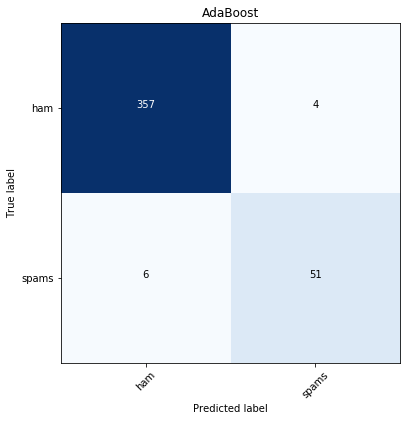

In [38]:
fig = plt.figure(figsize=(18,16))
i=1
for key,val in confusion_mat.items():
    plt.subplot(3,3,i);i+=1
    plot_confusion_matrix(val, classes=['ham','spams'], normalize=False,
                      title=key)

In [39]:
missclassified = np.nonzero(pred!=ytest)[0]
ind_miss = ytest.index[missclassified]
trainData.iloc[ind_miss,:]

,Unnamed: 0,message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell,label
781,1073,Dear U've been invited to XCHAT. This is our f...,0,0,0,3,0,90,2,0,1,18,1,1
2444,3272,You have 1 new voicemail. Please call 08719181...,0,0,0,0,0,50,0,1,0,8,1,1
1675,2247,Hi ya babe x u 4goten bout me?' scammers getti...,0,1,0,7,1,181,0,0,1,31,1,1
4095,5455,Wishing you a beautiful day. Each moment revea...,0,0,0,0,0,101,0,0,0,18,1,0
1185,1625,500 free text msgs. Just text ok to 80488 and ...,0,0,0,4,0,71,0,0,0,14,1,1
1105,1513,"Hey sweet, I was wondering when you had a mome...",0,2,0,9,1,458,2,0,0,95,1,0
1909,2558,This message is brought to you by GMW Ltd. and...,0,0,0,0,0,70,1,0,0,15,1,1
3823,5076,"This is the 2nd attempt to contract U, you hav...",0,0,0,1,0,132,1,1,0,25,5,1
695,956,Sorry i now then c ur msg... Yar lor so poor t...,0,0,0,6,4,122,0,0,0,27,1,0
292,396,From here after The performance award is calcu...,0,0,0,1,1,102,0,0,0,16,1,0


In [40]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [41]:
data = pd.read_csv('spamfinal.csv', encoding='latin-1')
data.head(n=10)

,Unnamed: 0,Category,Message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell
0,0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1
1,1,ham,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1
3,3,ham,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1
5,5,spam,FreeMsg Hey there darling it's been 3 week's n...,0,0,0,6,0,148,0,0,2,32,5
6,6,ham,Even my brother is not like to speak with me. ...,0,0,0,1,0,77,0,0,0,16,1
7,7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,1,0,1,0,160,0,0,0,26,1
8,8,spam,WINNER!! As a valued network customer you have...,0,0,0,2,0,158,2,1,3,26,5
9,9,spam,Had your mobile 11 months or more? U R entitle...,0,0,0,3,0,154,3,1,1,29,1


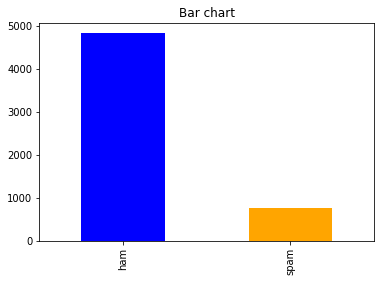

In [43]:
count_Class=pd.value_counts(data["Category"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('DataDistribution.png', dpi=300)
plt.show()

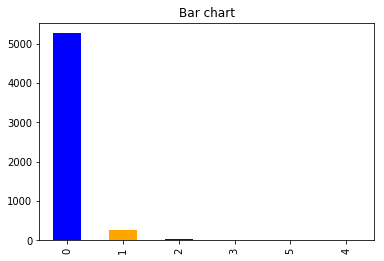

In [44]:
count_Class=pd.value_counts(data["Emoji"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('1.png', dpi=300)
plt.show()

In [45]:
data = data.rename(columns = {'Mathemtical symbols': 'Symbol','Num_Phone': 'Phone','Special characters':'Chars'})

data.head()

,Unnamed: 0,Category,Message,Emoji,Symbol,URL,shorthands,Dot,length,capitals,Phone,Chars,word_count,mis_spell
0,0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1
1,1,ham,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1
3,3,ham,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1


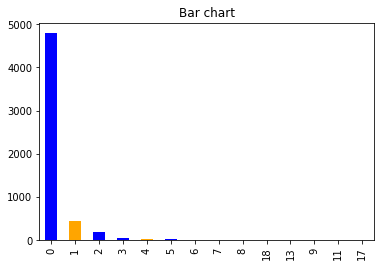

In [46]:
count_Class=pd.value_counts(data["Symbol"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('2.png', dpi=300)
plt.show()

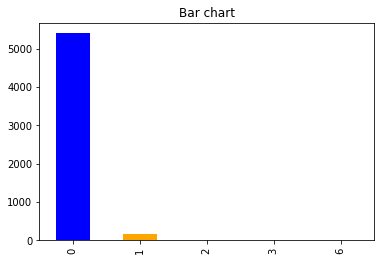

In [47]:
count_Class=pd.value_counts(data["URL"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('3.png', dpi=300)
plt.show()

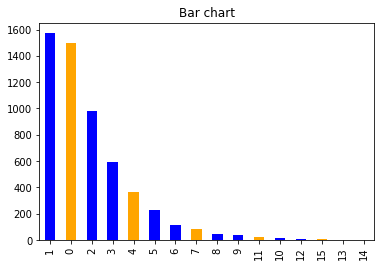

In [48]:
count_Class=pd.value_counts(data["shorthands"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('4.png', dpi=300)
plt.show()

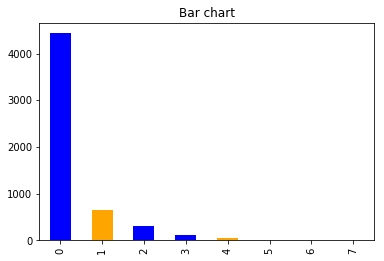

In [49]:
count_Class=pd.value_counts(data["Dot"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('5.png', dpi=300)
plt.show()

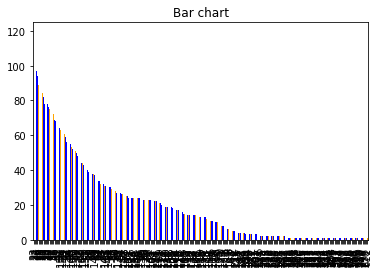

In [50]:
count_Class=pd.value_counts(data["length"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('6.png', dpi=300)
plt.show()

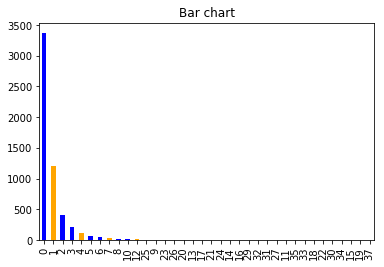

In [51]:
count_Class=pd.value_counts(data["capitals"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('7.png', dpi=300)
plt.show()

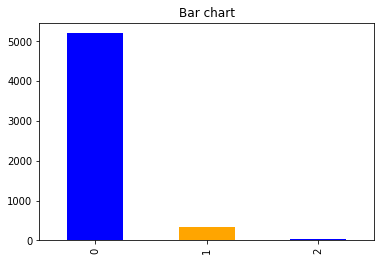

In [52]:
count_Class=pd.value_counts(data["Phone"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('8.png', dpi=300)
plt.show()

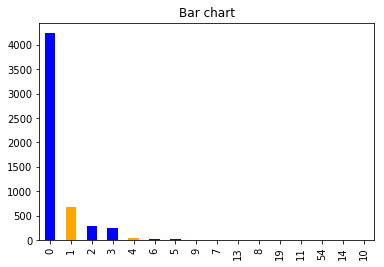

In [53]:
count_Class=pd.value_counts(data["Chars"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('9.png', dpi=300)
plt.show()

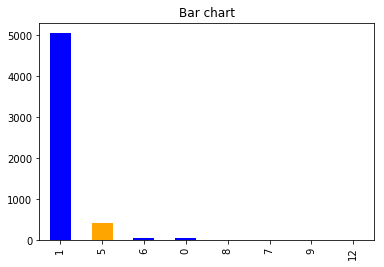

In [54]:
count_Class=pd.value_counts(data["mis_spell"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.savefig('11.png', dpi=300)
plt.show()

In [55]:
from collections import Counter

In [56]:
count1 = Counter(" ".join(data[data['Category']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['Category']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

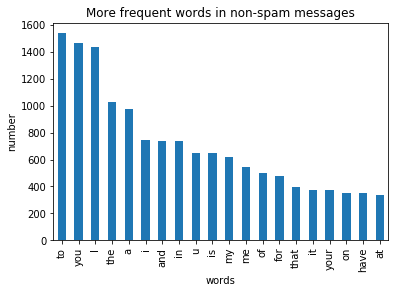

In [57]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('FrequentWords.png', dpi=300)
plt.show()

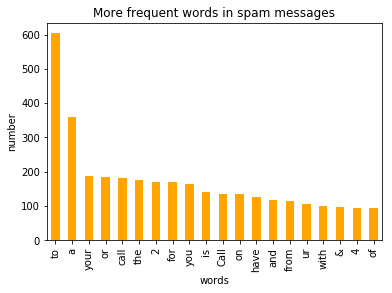

In [58]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.savefig('SpamFrequentWords.png', dpi=300)
plt.show()

In [59]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['Emoji', 'Symbol', 'URL', 'shorthands','Dot','length','capitals','Phone','Chars','word_count','mis_spell']]  # Features
y=data['Category']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test 

In [60]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

In [61]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [62]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9712918660287081


In [63]:
print("Precision",precision_score(y_test, y_pred, average="macro"))
print("recall",recall_score(y_test, y_pred, average="macro"))

Precision 0.950786056049214
recall 0.9233602088612455


In [64]:
accuracy_score(y_test, y_pred, normalize = True)

0.9712918660287081

In [65]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8648325358851675


In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8648325358851675


In [67]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
p=[]
r=[]
accuracy=[]
t=[0.5,0.4,0.3,0.2,0.1]
for i in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    #Create a Adaboost Classifier
    clf=AdaBoostClassifier(n_estimators=100)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    p.append(precision_score(y_test, y_pred, average="macro"))
    r.append(recall_score(y_test, y_pred, average="macro"))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))

Accuracy: 0.9673366834170855
Precision 0.9412235309096295
recall 0.9107326823842605
Accuracy: 0.9587258860475549
Precision 0.9314219189950184
recall 0.8943630136082257
Accuracy: 0.965311004784689
Precision 0.9493805652342238
recall 0.8978139267310494
Accuracy: 0.9641255605381166
Precision 0.9293359007657517
recall 0.9089939566299324
Accuracy: 0.9767025089605734
Precision 0.9649839743589743
recall 0.941572606214331


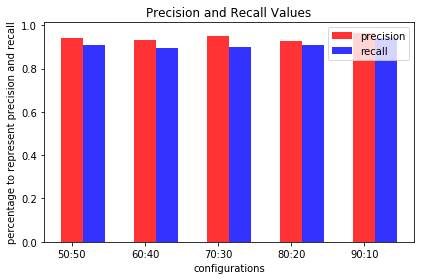

In [68]:
#plotting precision and recall
import matplotlib.pyplot as plt
import numpy as np
n_groups=5
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, p, bar_width,
                 alpha=opacity,
                 color='r',
                 label='precision')
rects2 = plt.bar(index+bar_width, r, bar_width, alpha=opacity, color='b', label='recall')
plt.xlabel('configurations')
plt.ylabel('percentage to represent precision and recall')
plt.title('Precision and Recall Values')
plt.xticks(index, ('50:50', '60:40', '70:30', '80:20', '90:10'))
plt.legend()
 
plt.tight_layout()
plt.savefig('Adaboost_PR.png', dpi=300)
plt.show()

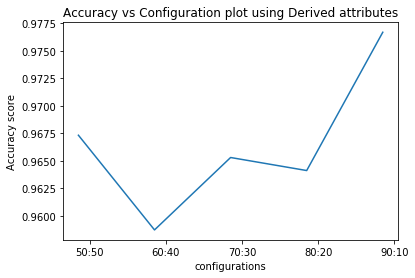

In [69]:
import matplotlib.pyplot as plt
n_groups=5
index = np.arange(n_groups)
plt.plot(accuracy)
plt.xlabel('configurations')
plt.ylabel('Accuracy score')
plt.title('Accuracy vs Configuration plot using Derived attributes')
plt.xticks(index+0.15, ('50:50', '60:40', '70:30', '80:20', '90:10'))
plt.savefig('Adaboost_acc.png', dpi=300) 
plt.show()

{20: 0.9760479041916168, 30: 0.9656549520766773, 40: 0.9652486518873576, 50: 0.9702780441035475, 10: 0.9760765550239234}


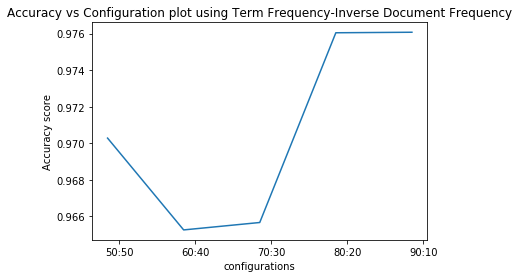

In [70]:
import matplotlib.pyplot as plt
n_groups=5
index = np.arange(n_groups)
test_size = []
accuracy1 = []
print(accuracyToTestSize)
for key, value in sorted(accuracyToTestSize.items(), reverse=True):
    test_size.append(key)
    accuracy1.append(value)
plt.plot(accuracy1)
plt.xlabel('configurations')
plt.ylabel('Accuracy score')
plt.title('Accuracy vs Configuration plot using Term Frequency-Inverse Document Frequency')
plt.xticks(index+0.15, ('50:50', '60:40', '70:30', '80:20', '90:10'))
 
plt.show()


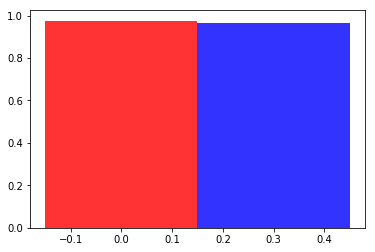

In [71]:
import numpy as np
import matplotlib.pyplot as plt

data = [accuracy1[3],
  [accuracy[3]]]

n_groups=1
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, data[0], bar_width,
                 alpha=opacity,
                 color='r',
                 label='TDocumentFrequency')
rects2 = plt.bar(index+bar_width, data[1], bar_width, alpha=opacity, color='b', label='Accuracy_Derived')

plt.show()